In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from functions import get_filepath, find_clustered_orfs, find_orfs, find_orfs_from_cluster, find_cluster_from_orf
from functions import samples_from_soils, perturbed_pHs, native_pH, enriched_native_pH, perturbed_pH_sample, plot

DATDIR = '/projects/p32818/metagenomic_data/data'

soils = ['Soil3', 'Soil5', 'Soil6', 'Soil9', 'Soil11', 'Soil12', 'Soil14', 'Soil15', 'Soil16', 'Soil17']

In [3]:
import os

os.chdir('/gpfs/projects/p32818/metagenomic_data')

os.getcwd()

import importlib
import functions
importlib.reload(functions)

<module 'functions' from '/gpfs/projects/p32818/metagenomic_data/functions.py'>

In [5]:
#For T0, build a plot with rows which are cluster IDs and columns which are Native pH
ORFs = find_orfs(get_filepath('T0', 'annotation'), 'K02567')
ORF_list = list(ORFs)
samples = pd.read_csv(f'{DATDIR}/T0_sampleIDs.tsv', header=None)[0]
sample_list = list(samples)
metadata = pd.read_csv(f'{DATDIR}/metadata.tsv', sep = '\t')
metadata = metadata.set_index('sample')


chunk_size = 100000

data = np.zeros((len(ORFs), 20)) #data for plot stored here, each row is a dinstinct ORF, 

for chunk in pd.read_csv(get_filepath('T0', 'abundance'), sep='\s+', header=None,  chunksize = chunk_size):
    filtered_chunk = chunk[chunk.iloc[:, 1].isin(ORFs)]
    for i in range(len(filtered_chunk)):
        sample_id = filtered_chunk.iloc[i, 0]
        orf = filtered_chunk.iloc[i, 1]
        rel_abundance = filtered_chunk.iloc[i, 2]
        spikein = metadata.loc[sample_id, 'spikein_sum']
        row_idx = ORF_list.index(orf)
        col_idx = sample_list.index(sample_id)
        data[row_idx, col_idx] += rel_abundance/spikein
        
        
absolute_data = data

np.savetxt("out/absolute_data_nap.tsv", np.array(data), delimiter = '\t', fmt = '%.6f')

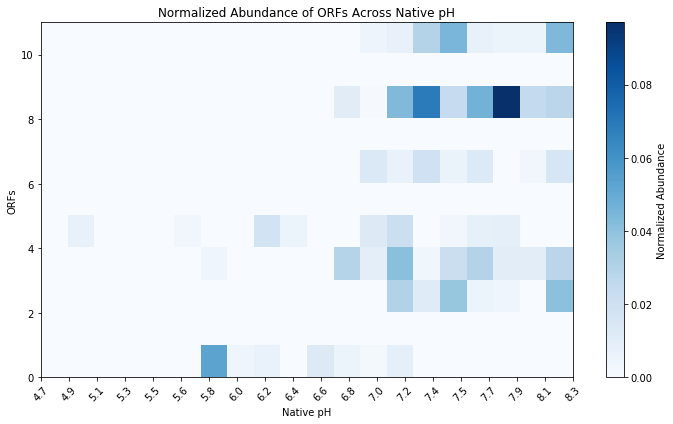

In [9]:
data = pd.read_csv("out/absolute_data_nap.tsv", sep='\t', header=None)
data = data.values
#sorted_data = data[np.argsort(-np.abs(data[:, 0]))]
#normalized_data = sorted_data / sorted_data.sum(axis=1, keepdims=True) #normalization step

x = np.linspace(4.7, 8.3, 20)


plt.figure(figsize=(10, 6))

plt.imshow(data, aspect='auto', cmap='Blues', extent=[x[0], x[-1], 0, data.shape[0]])

plt.xlabel('Native pH')
plt.ylabel('ORFs')
plt.title('Normalized Abundance of ORFs Across Native pH')

plt.colorbar(label='Normalized Abundance')

plt.xticks(ticks=np.linspace(x[0], x[-1], len(x)), labels=[f"{val:.1f}" for val in x], rotation=45)

plt.tight_layout()
plt.show()

In [6]:
#For T0, build a plot with rows which are cluster IDs and columns which are Native pH
ORFs = find_orfs(get_filepath('T0', 'annotation'), 'K02567')
ORF_list = list(ORFs)
print('\n ORFs \n')
print(ORF_list)
Cluster_IDs_nap = ORF_list
for i in range(len(ORF_list)):
    Cluster_IDs_nap[i] = find_cluster_from_orf(ORF_list[i])
    print(Cluster_IDs_nap[i])
print('\n Clusters \n')
print(Cluster_IDs_nap)

IDs = np.array(Cluster_IDs_nap)

sort_indices = np.argsort(-np.abs(data[:, 0])) 

sorted_data = data[sort_indices]
sorted_IDs = IDs[sort_indices]

# Dictionary to accumulate data
id_to_data = {} #given an id, the dictionary spits out the data array
for id, row in zip(sorted_IDs, sorted_data):
    if id in id_to_data:
        id_to_data[id] += row
    else:
        id_to_data[id] = row.copy()

# Reconstruct the arrays
unique_IDs = list(id_to_data.keys())
combined_data = np.array([id_to_data[id] for id in unique_IDs])

np.savetxt("out/cluster_ids_nap.tsv", unique_IDs, delimiter = '\t', fmt = '%s')
np.savetxt("out/clustered_data_nap.tsv", combined_data, delimiter = '\t', fmt = '%0.6f')
    


 ORFs 

['T0.scaffold_826610199_c1_1', 'T0.scaffold_170828508_c1_1', 'T0.scaffold_785029462_c1_5', 'T0.scaffold_500133190_c1_1', 'T0.scaffold_915148188_c1_1', 'T0.scaffold_133727621_c1_1', 'T0.scaffold_629956420_c1_1', 'T0.scaffold_915288777_c1_1', 'T0.scaffold_11476034_c1_1', 'T0.scaffold_61541039_c1_1', 'T0.scaffold_831992212_c1_1']
Soil17.scaffold_704643222_c1_1
T0.scaffold_170828508_c1_1
T0.scaffold_785029462_c1_5
T0.scaffold_500133190_c1_1
T0.scaffold_915148188_c1_1
T0.scaffold_133727621_c1_1
Soil16.scaffold_1132685456_c1_1
Soil14.scaffold_603633783_c1_1
T0.scaffold_11476034_c1_1
T0.scaffold_61541039_c1_1
Soil9.scaffold_399115430_c1_5

 Clusters 

['Soil17.scaffold_704643222_c1_1', 'T0.scaffold_170828508_c1_1', 'T0.scaffold_785029462_c1_5', 'T0.scaffold_500133190_c1_1', 'T0.scaffold_915148188_c1_1', 'T0.scaffold_133727621_c1_1', 'Soil16.scaffold_1132685456_c1_1', 'Soil14.scaffold_603633783_c1_1', 'T0.scaffold_11476034_c1_1', 'T0.scaffold_61541039_c1_1', 'Soil9.scaffold_399115430_

['Soil17.scaffold_704643222_c1_1', 'T0.scaffold_170828508_c1_1', 'T0.scaffold_785029462_c1_5', 'T0.scaffold_500133190_c1_1', 'T0.scaffold_915148188_c1_1', 'T0.scaffold_133727621_c1_1', 'Soil16.scaffold_1132685456_c1_1', 'Soil14.scaffold_603633783_c1_1', 'T0.scaffold_11476034_c1_1', 'T0.scaffold_61541039_c1_1', 'Soil9.scaffold_399115430_c1_5']
[[0.       0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.       0.       0.00483  0.007073 0.029725 0.044787
  0.00703  0.005013 0.005103 0.043696]
 [0.       0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.       0.      ]
 [0.       0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.       0.010971 0.001115 0.043257 0.068854 0.023868
  0.046249 0.096981 0.02471  0.027638]
 [0.       0.       0.       0.       0.       0.       0.       0.
  0.       0.       0.       0.       0.       0. 

/software/python-anaconda3/2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


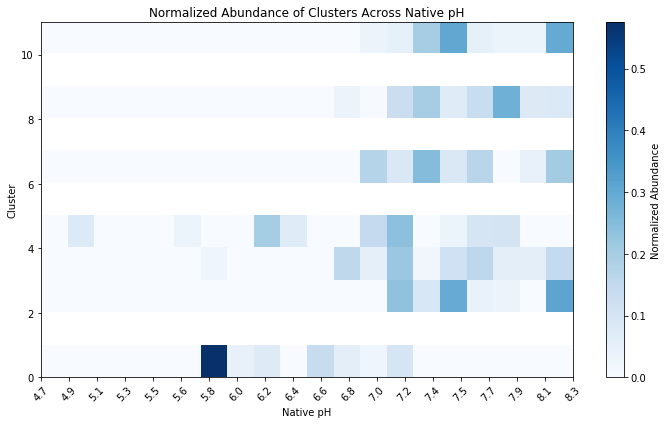

In [7]:
cluster_IDs = pd.read_csv('out/cluster_ids_nap.tsv', sep='\t', header=None)
clustered_data = pd.read_csv('out/clustered_data_nap.tsv', sep='\t', header=None)
cluster_IDs = cluster_IDs.values
cluster_IDs = [item[0] for item in cluster_IDs]
clustered_data = clustered_data.values
print(cluster_IDs)
print(clustered_data)

normalized_data = clustered_data / clustered_data.sum(axis=1, keepdims=True) #normalization step


x = np.linspace(4.7, 8.3, 20)


plt.figure(figsize=(10, 6))

plt.imshow(normalized_data, aspect='auto', cmap='Blues', extent=[x[0], x[-1], 0, normalized_data.shape[0]])

plt.xlabel('Native pH')
plt.ylabel('Cluster')
plt.title('Normalized Abundance of Clusters Across Native pH')

plt.colorbar(label='Normalized Abundance')

plt.xticks(ticks=np.linspace(x[0], x[-1], len(x)), labels=[f"{val:.1f}" for val in x], rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
tracking = pd.read_csv('out/track_clusters_nap.tsv')
tracking = tracking.values
plt.imshow(tracking)